In [1]:
import pandas as pd

# Load data
campus_info = pd.read_csv('../Data/SMTO_2015/Campus_Info.csv')
df = pd.read_csv('../Data/SMTO_2015/SMTO_2015_Households.csv')[['HmTTS2006', 'hhlivingsituation', 'hhcarnumber','hhnumyoungerthan18','hhnumolderorequalto18','hhincomelevel']]
df = df.join(pd.read_csv('../Data/SMTO_2015/SMTO_2015_Respondents.csv')[['pscampusattend', 'personstatusgrad', 'personstatustime', 'pscmpgender','psdrivinglicenseownerflag','psworknumhoursperweek']])
df.head()

,HmTTS2006,hhlivingsituation,hhcarnumber,hhnumyoungerthan18,hhnumolderorequalto18,hhincomelevel,pscampusattend,personstatusgrad,personstatustime,pscmpgender,psdrivinglicenseownerflag,psworknumhoursperweek
0,261.0,Live with family/parents,1,3,4,Unknown,Scarborough (UTSC),UG,FT,Female,0,NaN
1,71.0,Live with partner,0,0,2,"$ 90,000 - 119,999",Downtown Toronto (St. George),Grad,FT,Female,1,NaN
2,3714.0,Live with family/parents,1,0,4,Unknown,Downtown Toronto (St. George),UG,FT,Female,1,NaN
3,74.0,Live with roommates,0,0,4,Unknown,Downtown Toronto (St. George),UG,FT,Male,1,NaN
4,71.0,Live with partner,0,0,2,"$ 30,000 - 59,999",Downtown Toronto (St. George),Grad,FT,Male,1,NaN


In [2]:
df = df.rename(columns={'HmTTS2006': 'HomeZone', 'pscampusattend': 'Campus', 'hhlivingsituation': 'Family', 
                       'personstatusgrad': 'Level', 'personstatustime': 'Status', 'psuniversityinvolvednumyears': 'Years', 'hhcarnumber': 'Cars',
                       'hhincomelevel': 'Income', 'pscmpgender': 'Gender', 'psdrivinglicenseownerflag': 'Licence', 'psworknumhoursperweek': 'Work',
                       'hhnumyoungerthan18': 'Children', 'hhnumolderorequalto18':'Adults'})
df.columns

Index(['HomeZone', 'Family', 'Cars', 'Children', 'Adults', 'Income', 'Campus',
       'Level', 'Status', 'Gender', 'Licence', 'Work'],
      dtype='object')

In [3]:
# Clean and reformat
df = df[df['HomeZone'].notnull()]
df = df[df['Campus'].notnull()]
df['HomeZone'] = pd.to_numeric(df['HomeZone'], downcast='signed')
df['Family'] = (df['Family'] == 'Live with family/parents')*1
df.columns

Index(['HomeZone', 'Family', 'Cars', 'Children', 'Adults', 'Income', 'Campus',
       'Level', 'Status', 'Gender', 'Licence', 'Work'],
      dtype='object')

In [4]:
# Dataframe with walk distances
df_path = pd.read_csv('../../LoS/Walk_Distances.csv')
origins = list(set(list(df_path['Origin'])))
dists = list(df_path['Data'])

# Function for distance lookup
def find_distance(origin, destination):
    try:
        i = origins.index(origin)
    except ValueError:
        return -1
    j = origins.index(destination)
    return dists[i*2392 + j] / 1000

# List of campus' TTS zones from Joven's MOE data
campus_zones = list(campus_info['Zone'])
school_codes = list(campus_info['Code'])

# Load distances into dataframe
for i in range(len(campus_zones)):
    df["Dist." + school_codes[i]] = df['HomeZone'].apply(lambda x: find_distance(x, campus_zones[i]))
df = df[df['Dist.SG'] != -1]
df.columns

Index(['HomeZone', 'Family', 'Cars', 'Children', 'Adults', 'Income', 'Campus',
       'Level', 'Status', 'Gender', 'Licence', 'Work', 'Dist.SG', 'Dist.SC',
       'Dist.MI', 'Dist.YK', 'Dist.YG', 'Dist.RY', 'Dist.OC'],
      dtype='object')

In [5]:
df2 = pd.DataFrame(df.iloc[:, 12:19].apply(lambda x: x.nsmallest(7).index.tolist(), axis=1).tolist(), index=df.index)
df = pd.concat((df, df2), axis=1)
df2 = pd.DataFrame(df.iloc[:, 12:19].apply(lambda x: x.nsmallest(7).tolist(), axis=1).tolist(), index=df.index)
df = pd.concat((df, df2), axis=1)
print(df.columns)
pd.set_option('display.max_columns', None)
df.head()

Index(['HomeZone',   'Family',     'Cars', 'Children',   'Adults',   'Income',
         'Campus',    'Level',   'Status',   'Gender',  'Licence',     'Work',
        'Dist.SG',  'Dist.SC',  'Dist.MI',  'Dist.YK',  'Dist.YG',  'Dist.RY',
        'Dist.OC',          0,          1,          2,          3,          4,
                5,          6,          0,          1,          2,          3,
                4,          5,          6],
      dtype='object')


,HomeZone,Family,Cars,Children,Adults,Income,Campus,Level,Status,Gender,Licence,Work,Dist.SG,Dist.SC,Dist.MI,Dist.YK,Dist.YG,Dist.RY,Dist.OC,0,1,2,3,4,5,6,0,1,2,3,4,5,6
0,261,1,1,3,4,Unknown,Scarborough (UTSC),UG,FT,Female,0,NaN,10.256060,14.88098,29.20657,22.59214,9.218413,9.580635,11.241730,Dist.YG,Dist.RY,Dist.SG,Dist.OC,Dist.SC,Dist.YK,Dist.MI,9.218413,9.580635,10.256060,11.24173,14.88098,22.59214,29.20657
1,71,0,0,0,2,"$ 90,000 - 119,999",Downtown Toronto (St. George),Grad,FT,Female,1,NaN,1.132351,23.03920,19.64290,15.87906,11.211150,2.675173,2.723838,Dist.SG,Dist.RY,Dist.OC,Dist.YG,Dist.YK,Dist.MI,Dist.SC,1.132351,2.675173,2.723838,11.21115,15.87906,19.64290,23.03920
2,3714,1,1,0,4,Unknown,Downtown Toronto (St. George),UG,FT,Female,1,NaN,23.319230,45.63271,4.51742,28.58045,32.555200,24.964000,23.686150,Dist.MI,Dist.SG,Dist.OC,Dist.RY,Dist.YK,Dist.YG,Dist.SC,4.517420,23.319230,23.686150,24.96400,28.58045,32.55520,45.63271
3,74,0,0,0,4,Unknown,Downtown Toronto (St. George),UG,FT,Male,1,NaN,0.699414,24.11954,19.43932,16.81186,12.830410,2.314008,1.541276,Dist.SG,Dist.OC,Dist.RY,Dist.YG,Dist.YK,Dist.MI,Dist.SC,0.699414,1.541276,2.314008,12.83041,16.81186,19.43932,24.11954
4,71,0,0,0,2,"$ 30,000 - 59,999",Downtown Toronto (St. George),Grad,FT,Male,1,NaN,1.132351,23.03920,19.64290,15.87906,11.211150,2.675173,2.723838,Dist.SG,Dist.RY,Dist.OC,Dist.YG,Dist.YK,Dist.MI,Dist.SC,1.132351,2.675173,2.723838,11.21115,15.87906,19.64290,23.03920


In [6]:
pd.set_option('display.max_columns', None)
df.head()

,HomeZone,Family,Cars,Children,Adults,Income,Campus,Level,Status,Gender,Licence,Work,Dist.SG,Dist.SC,Dist.MI,Dist.YK,Dist.YG,Dist.RY,Dist.OC,0,1,2,3,4,5,6,0,1,2,3,4,5,6
0,261,1,1,3,4,Unknown,Scarborough (UTSC),UG,FT,Female,0,NaN,10.256060,14.88098,29.20657,22.59214,9.218413,9.580635,11.241730,Dist.YG,Dist.RY,Dist.SG,Dist.OC,Dist.SC,Dist.YK,Dist.MI,9.218413,9.580635,10.256060,11.24173,14.88098,22.59214,29.20657
1,71,0,0,0,2,"$ 90,000 - 119,999",Downtown Toronto (St. George),Grad,FT,Female,1,NaN,1.132351,23.03920,19.64290,15.87906,11.211150,2.675173,2.723838,Dist.SG,Dist.RY,Dist.OC,Dist.YG,Dist.YK,Dist.MI,Dist.SC,1.132351,2.675173,2.723838,11.21115,15.87906,19.64290,23.03920
2,3714,1,1,0,4,Unknown,Downtown Toronto (St. George),UG,FT,Female,1,NaN,23.319230,45.63271,4.51742,28.58045,32.555200,24.964000,23.686150,Dist.MI,Dist.SG,Dist.OC,Dist.RY,Dist.YK,Dist.YG,Dist.SC,4.517420,23.319230,23.686150,24.96400,28.58045,32.55520,45.63271
3,74,0,0,0,4,Unknown,Downtown Toronto (St. George),UG,FT,Male,1,NaN,0.699414,24.11954,19.43932,16.81186,12.830410,2.314008,1.541276,Dist.SG,Dist.OC,Dist.RY,Dist.YG,Dist.YK,Dist.MI,Dist.SC,0.699414,1.541276,2.314008,12.83041,16.81186,19.43932,24.11954
4,71,0,0,0,2,"$ 30,000 - 59,999",Downtown Toronto (St. George),Grad,FT,Male,1,NaN,1.132351,23.03920,19.64290,15.87906,11.211150,2.675173,2.723838,Dist.SG,Dist.RY,Dist.OC,Dist.YG,Dist.YK,Dist.MI,Dist.SC,1.132351,2.675173,2.723838,11.21115,15.87906,19.64290,23.03920


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

y = df['Campus']
#x = df.drop(columns = ['HomeZone', 'Campus', 'Work'])
#x = df[['Dist.SG', 'Dist.SC', 'Dist.MI', 'Dist.YK', 'Dist.YG', 'Dist.RY', 'Dist.OC']]
#x = df['Dist.SG'].notnull()

res = []

def average(l):
    return sum(l) / len(l)
    
def get_results(x, print_vars = False):
    if print_vars:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        probs = rf.predict_proba(X_test)
        schools = list(rf.classes_)
        results = pd.concat((y_test.reset_index(drop=True), pd.DataFrame(probs)), axis=1)
        print(pd.Series(rf.feature_importances_, index = x.columns).sort_values(ascending=False))
        print("Accuracy", rf.score(X_test, y_test))
        print("AveProb", results.apply(lambda x: x[schools.index(x.Campus)], axis=1).mean())
        return
    out = []
    for j in range(3):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        probs = rf.predict_proba(X_test)
        schools = list(rf.classes_)
        results = pd.concat((y_test.reset_index(drop=True), pd.DataFrame(probs)), axis=1)
        out.append(rf.score(X_test, y_test))
        out.append(results.apply(lambda x: x[schools.index(x.Campus)], axis=1).mean())
    return [average(out[::2]), average(out[1::2])]

for i in range(7):
    # Labels only
    x = df.iloc[:, 19:(20+i)]
    x = pd.get_dummies(x)
    res.append([i+1, False] + get_results(x))
    
    # Labels and distances 
    x = df.iloc[:, list(range(19, 20+i)) + list(range(26, 27+i))]
    x = pd.get_dummies(x)
    res.append([i+1, True] + get_results(x))
    
    """# Labels and all distances
    x = df.iloc[:, list(range(19, 20+i)) + list(range(12, 19))]
    x = pd.get_dummies(x)
    res.append([i+1, True] + get_results(x))"""

output = pd.DataFrame(res, columns=['Labels', 'Distances', 'Accuracy', 'AveProb'])
output

,Labels,Distances,Accuracy,AveProb
0,1,False,0.460275,0.333048
1,1,True,0.453704,0.381849
2,2,False,0.463112,0.336703
3,2,True,0.456765,0.381082
4,3,False,0.466547,0.345074
5,3,True,0.457288,0.382761
6,4,False,0.460499,0.349867
7,4,True,0.457960,0.382273
8,5,False,0.460125,0.351681
9,5,True,0.451986,0.380045


In [9]:
output.to_csv('Location_Choice_Reformat_Output.csv', index = False)

In [19]:
rf = RandomForestClassifier(n_estimators=100, verbose = False)
x = df['HomeZone'].notnull().values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy", rf.score(X_test, y_test))

Accuracy 0.40658602150537637


In [20]:
df['HomeZone'].describe()

count    14879.000000
mean      1139.947779
std       1389.424182
min          1.000000
25%        105.000000
50%        411.000000
75%       2236.500000
max       8501.000000
Name: HomeZone, dtype: float64

In [34]:
(df['HomeZone'] / 1000).astype(int).value_counts()

0    9965
3    2240
2    1826
1     436
4     324
5      81
8       6
6       1
Name: HomeZone, dtype: int64

In [41]:
def zone_to_region(z):
    regions = {0: "Toronto", 1: "Durham", 2: "York", 3: "Peel", 4: "Halton",
               5: "Hamilton", 6: "Niagara", 7: "Waterloo", 8: "Wellington/Dufferin"}
    return regions[z / 1000]

#df['Region'] = df['HomeZone'].apply(zone_to_region)
print(get_results((df['HomeZone'] / 1000).astype(int).values.reshape(-1, 1)))
print(get_results((df['HomeZone'] / 100).astype(int).values.reshape(-1, 1)))
print(get_results((df['HomeZone'] / 10).astype(int).values.reshape(-1, 1)))
print(get_results((df['HomeZone']).values.reshape(-1, 1)))
print(get_results((df['HomeZone'].notnull()).values.reshape(-1, 1)))

[0.43637992831541217, 0.28779150866940784]
[0.4637096774193548, 0.33805146889370924]
[0.4659498207885305, 0.36521180524452096]
[0.4607974910394265, 0.38416392224802465]
[0.4018070489844683, 0.25652189174641504]


[[1252    3  223   74   11  202   47]
 [  44    9   12    4    2   16    3]
 [ 337    3  369   64    4  133   40]
 [  64    0   50  124    1   39    4]
 [  96    0   12    8    0   25    2]
 [ 380    4  194   53    0  183   44]
 [ 100    2   50    2    3   62  110]]


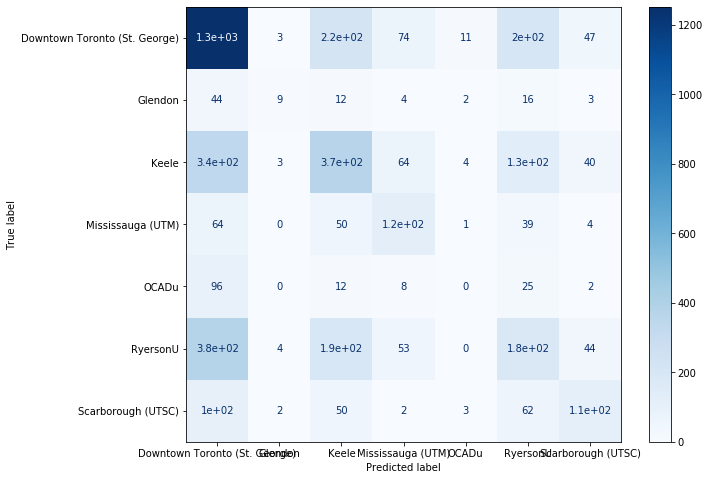

In [63]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

x = pd.get_dummies(df.iloc[:, list(range(19, 25)) + list(range(27, 33))])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#y_pred = rf.predict(X_test)
"""probs = rf.predict_proba(X_test)
schools = list(rf.classes_)
results = pd.concat((y_test.reset_index(drop=True), pd.DataFrame(probs)), axis=1)
out.append(rf.score(X_test, y_test))
out.append(results.apply(lambda x: x[schools.index(x.Campus)], axis=1).mean())"""
#multilabel_confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = [10, 8]
disp = plot_confusion_matrix(rf.fit(X_train, y_train), X_test, y_test,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)
plt.show()

In [102]:
from sklearn.metrics import *
"""probs = rf.predict_proba(X_test)
schools = list(rf.classes_)
results = pd.concat((y_test.reset_index(drop=True), pd.DataFrame(probs)), axis=1)
out.append(rf.score(X_test, y_test))
out.append(results.apply(lambda x: x[schools.index(x.Campus)], axis=1).mean())
"""
x = pd.get_dummies(df.iloc[:, list(range(19, 25)) + list(range(27, 33))])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_pred = rf.predict(X_test)
print("PRF Mic\t", rf.score(X_test, y_test)) # Acc
print("PRF Mac\t", precision_recall_fscore_support(y_test, y_pred, average = 'macro')[:3]) # Rec = Bal Acc
print("PRF Wgt\t", precision_recall_fscore_support(y_test, y_pred, average = 'weighted')[:3])

print()
print("Matthew\t", matthews_corrcoef(y_test, y_pred))
print("Jac Mic\t", jaccard_score(y_test, y_pred, average = 'micro'))
print("Jac Mac\t", jaccard_score(y_test, y_pred, average = 'macro'))
print("Jac Wgt\t", jaccard_score(y_test, y_pred, average = 'weighted'))

print(classification_report(y_test, y_pred, digits = 3))
print(classification_report(y_test, y_pred, output_dict = True))

PRF Mic	 0.5450268817204301
PRF Mac	 (0.4869829584097544, 0.39005852619842524, 0.39966730226761343)
PRF Wgt	 (0.525952461637236, 0.5450268817204301, 0.5219867471315477)

Matthew	 0.36913328682619584
Jac Mic	 0.3745958429561201
Jac Mac	 0.26752724795372085
Jac Wgt	 0.36693268072445673
                               precision    recall  f1-score   support

Downtown Toronto (St. George)      0.598     0.766     0.672      1780
                      Glendon      0.542     0.127     0.206       102
                        Keele      0.528     0.510     0.519       949
            Mississauga (UTM)      0.485     0.582     0.530       285
                        OCADu      0.312     0.034     0.061       148
                     RyersonU      0.429     0.310     0.360       878
           Scarborough (UTSC)      0.514     0.401     0.450       322

                     accuracy                          0.545      4464
                    macro avg      0.487     0.390     0.400      4464
   

In [66]:
y_pred

array(['Mississauga (UTM)', 'RyersonU', 'RyersonU', ...,
       'Downtown Toronto (St. George)', 'Downtown Toronto (St. George)',
       'Downtown Toronto (St. George)'], dtype=object)

In [ ]:
"""
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 12))
plt.tight_layout()
plt.subplot(1, 2, 1)
pd.Series(y_pred).value_counts().plot.pie()
plt.title("Predicted Campuses")
plt.subplot(1, 2, 2)
pd.Series(y_test).value_counts().plot.pie()
plt.title("Actual Campuses")
plt.show()
"""

In [ ]:
# import pickle
# pickle.dump(rf, open('Location_Choice_Model', 'wb'))

# To open:
# model = pickle.load(open(filename, 'rb'))

In [103]:
y_test.value_counts(normalize=True)

Downtown Toronto (St. George)    0.398746
Keele                            0.212590
RyersonU                         0.196685
Scarborough (UTSC)               0.072133
Mississauga (UTM)                0.063844
OCADu                            0.033154
Glendon                          0.022849
Name: Campus, dtype: float64